In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_palette("GnBu_d")
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
read_once_df = pd.read_csv("../boston_2016_prep_cluster.csv")

In [3]:
df = read_once_df
df["start_time"] = pd.to_datetime(df["start_time"],format="%Y-%m-%d %H:%M:%S") # FORMAT %Y-%m-%d %H:%M:%S beachte - und :
df["end_time"] = pd.to_datetime(df["end_time"],format="%Y-%m-%d %H:%M:%S")

In [4]:
# df['user_type'] = df['user_type'].replace(['Customer','Subscriber'],[0,1])
# user_type -> 
# 0 = Customer
# 1 = Subscriber

In [5]:
len(df)

1233600

In [6]:
df.head(0)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_coordinates,end_coordinates,Distance (KM),Duration (Seconds),Speed (km/h),start_hour,start_distance_center,end_distance_center


In [7]:
df.drop(['Unnamed: 0','start_time','end_time','start_station_id','end_station_id','start_station_name','end_station_name','bike_id','start_coordinates','end_coordinates'], axis=1, inplace=True)

In [8]:
df.head(5)

,user_type,Distance (KM),Duration (Seconds),Speed (km/h),start_hour,start_distance_center,end_distance_center
0,Subscriber,2.322721,1939.0,4.312426,0,1.988436,4.163269
1,Subscriber,2.322721,1928.0,4.337030,0,1.988436,4.163269
2,Subscriber,2.322721,1814.0,4.609589,0,1.988436,4.163269
3,Subscriber,2.322721,1789.0,4.674004,0,1.988436,4.163269
4,Customer,1.609739,941.0,6.158407,0,1.988436,2.911715


X -> df bei workshop

In [9]:
X = df

In [10]:
X = df.drop("user_type", axis=1)
y = df["user_type"]
X.head()

,Distance (KM),Duration (Seconds),Speed (km/h),start_hour,start_distance_center,end_distance_center
0,2.322721,1939.0,4.312426,0,1.988436,4.163269
1,2.322721,1928.0,4.337030,0,1.988436,4.163269
2,2.322721,1814.0,4.609589,0,1.988436,4.163269
3,2.322721,1789.0,4.674004,0,1.988436,4.163269
4,1.609739,941.0,6.158407,0,1.988436,2.911715


In [11]:
y.head()

0    Subscriber
1    Subscriber
2    Subscriber
3    Subscriber
4      Customer
Name: user_type, dtype: object

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,Distance (KM),Duration (Seconds),Speed (km/h),start_hour,start_distance_center,end_distance_center
0,0.372573,0.944184,-1.343869,-2.894096,-0.592742,0.633146
1,0.372573,0.934278,-1.337465,-2.894096,-0.592742,0.633146
2,0.372573,0.831612,-1.266517,-2.894096,-0.592742,0.633146
3,0.372573,0.809097,-1.249749,-2.894096,-0.592742,0.633146
4,-0.206811,0.045404,-0.863354,-2.894096,-0.592742,-0.067060


In [13]:
df_scaled = X_scaled_df
df_scaled["user_type"] = df["user_type"]

In [14]:
# sns.pairplot(data=df_scaled, hue="user_type")

In [15]:
from sklearn.cluster import KMeans

In [16]:
# k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

# clusters = []
# losses = []

# for k in range(k_max):
#     model = KMeans(n_clusters=k+1)
#     model.fit(X_scaled)
#     clusters.append(k+1)
#     losses.append(model.inertia_)

In [17]:
# plt.plot(clusters, losses)
# plt.show()

In [18]:
# plt.plot(clusters, losses)
# plt.xlim([0,20])

In [19]:
numbers = ["zero", "one", "two", "three","four","five","six"]

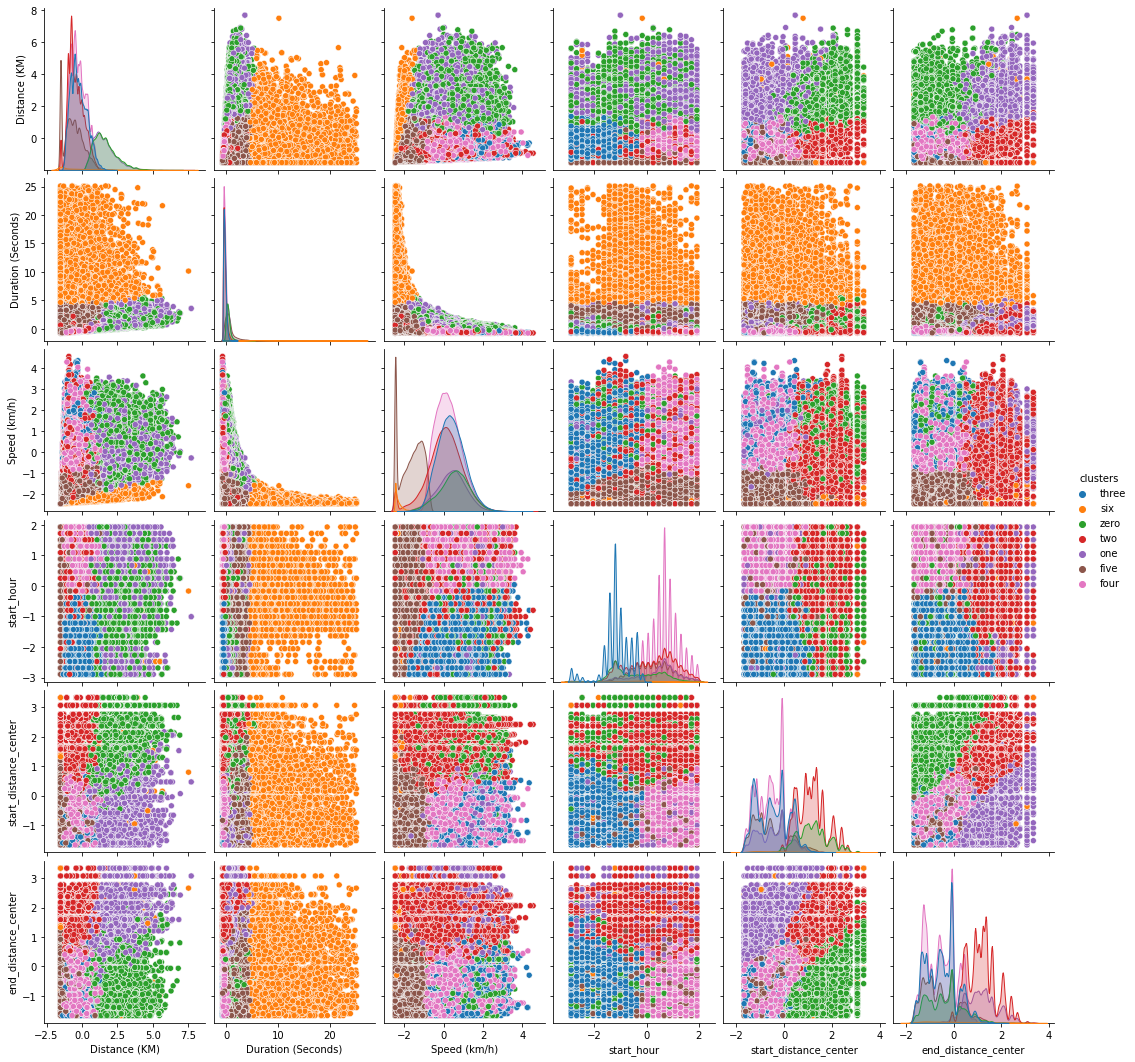

In [20]:
seven_means = KMeans(n_clusters=7)
seven_means.fit(X_scaled)
df_scaled["clusters"] = seven_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")